<a href="https://colab.research.google.com/github/shivamrahane/Spam_Mail_Prediction-Logistic-Regression-/blob/main/Bike_Sharing_Demand_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Dependancy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

## **Import the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/datasets/ML datasets/Regression datasets/SeoulBikeData.csv', encoding='latin1')

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
4501  06/06/2018               1444    13             27.3           52   
1867  16/02/2018                126    19              0.6           59   
2826  28/03/2018               1839    18             17.0           53   
2579  18/03/2018                587    11              8.5           49   
1987  21/02/2018                460    19             -0.1           39   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
4501               3.1               613                       16.5   
1867               2.3              1939                       -6.5   
2826               3.1              1855                        7.3   
2579               0.7               718                       -1.6   
1987               2.8              2000                      -12.4   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
4501                     3.21           0.0            0.0  Summer   
1867                     0.00           0.0            0.0  Winter   
2826                     0.35           0.0            0.0  Spring   
2579                     0.76           0.0            0.0  Spring   
1987                     0.00           0.0            0.0  Winter   

         Holiday Functioning Day  
4501     Holiday             Yes  
1867     Holiday             Yes  
2826  No Holiday             Yes  
2579  No Holiday             Yes  
1987  No Holiday             Yes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### **Relationship b/w Seasons and Rented Bike Count**

In [ ]:
Seasons_and_Rented_Bike_Count = df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending=False)
Seasons_and_Rented_Bike_Count

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64

<ipython-input-10-2640becdb25b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Seasons_and_Rented_Bike_Count.index, y=Seasons_and_Rented_Bike_Count.values,palette='tab10')


Text(0, 0.5, 'Total Rented Bike Count')

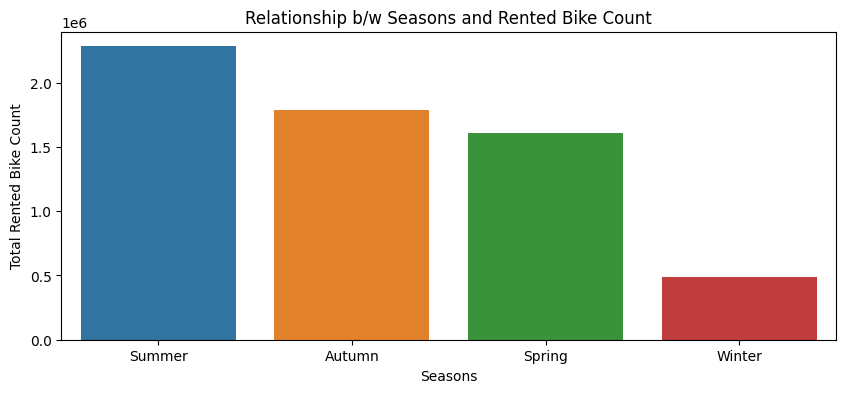

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=Seasons_and_Rented_Bike_Count.index, y=Seasons_and_Rented_Bike_Count.values,palette='tab10')
plt.title('Relationship b/w Seasons and Rented Bike Count')
plt.xlabel('Seasons')
plt.ylabel('Total Rented Bike Count')


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Relationship b/w Holiday Seasons and Rented Bike Count**

In [ ]:
Holiday_and_Rented_Bike_Count = df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending=False)
Holiday_and_Rented_Bike_Count

Holiday
No Holiday    5956419
Holiday        215895
Name: Rented Bike Count, dtype: int64

<ipython-input-13-0cd1f80fd699>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Holiday_and_Rented_Bike_Count.index, y=Holiday_and_Rented_Bike_Count.values,palette='tab10')


Text(0, 0.5, 'Total Rented Bike Count')

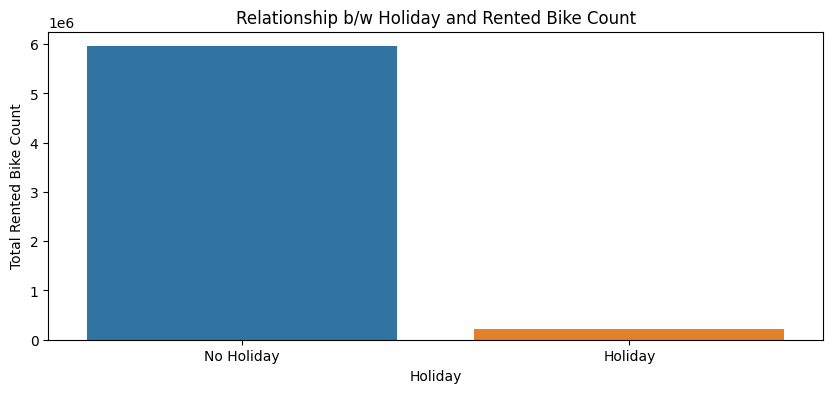

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=Holiday_and_Rented_Bike_Count.index, y=Holiday_and_Rented_Bike_Count.values,palette='tab10')
plt.title('Relationship b/w Holiday and Rented Bike Count')
plt.xlabel('Holiday')
plt.ylabel('Total Rented Bike Count')

<Axes: ylabel='Rented Bike Count'>

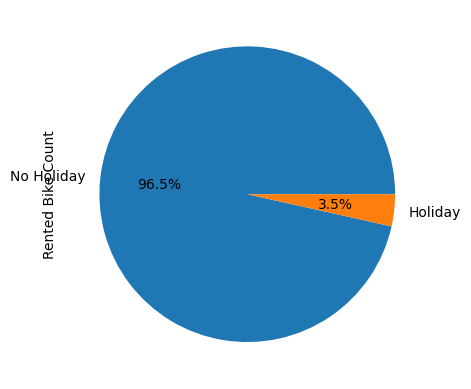

In [ ]:
Holiday_and_Rented_Bike_Count.plot(kind = 'pie',autopct = '%1.1f%%')

In [ ]:
Holiday_and_Rented_Bike_Count = df.groupby(['Holiday','Seasons'])['Rented Bike Count'].sum().unstack()
Holiday_and_Rented_Bike_Count

Seasons      Autumn   Spring   Summer  Winter
Holiday                                      
Holiday       91018    45742    49063   30072
No Holiday  1698984  1566167  2234171  457097

Text(0, 0.5, 'Total Rented Bike Count')

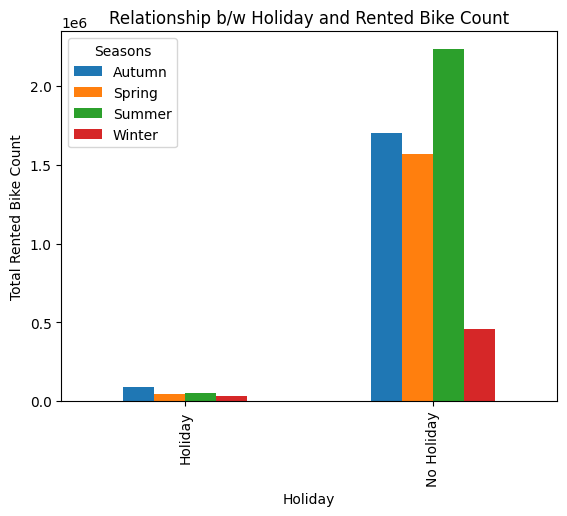

In [ ]:

Holiday_and_Rented_Bike_Count.plot(kind = 'bar')
plt.title('Relationship b/w Holiday and Rented Bike Count')
plt.xlabel('Holiday')
plt.ylabel('Total Rented Bike Count')

#### **Relationship b/w seasons humidity and bike count**

In [ ]:
df['Humidity(%)'].unique()

array([37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 26, 54, 58, 66, 77, 79,
       81, 83, 84, 87, 86, 82, 68, 57, 49, 41, 48, 51, 53, 52, 55, 56, 69,
       71, 73, 75, 91, 92, 89, 85, 76, 90, 88, 47, 30, 29, 32, 43, 45, 44,
       42, 34, 33, 31, 28, 46, 59, 78, 70, 64, 60, 94, 93, 96, 65, 50, 74,
       63, 61, 72, 62, 22, 67, 80, 95, 15, 20, 17, 18, 16, 19, 14, 97, 98,
       10, 13, 12, 11,  0])

<Axes: xlabel='Humidity(%)', ylabel='Rented Bike Count'>

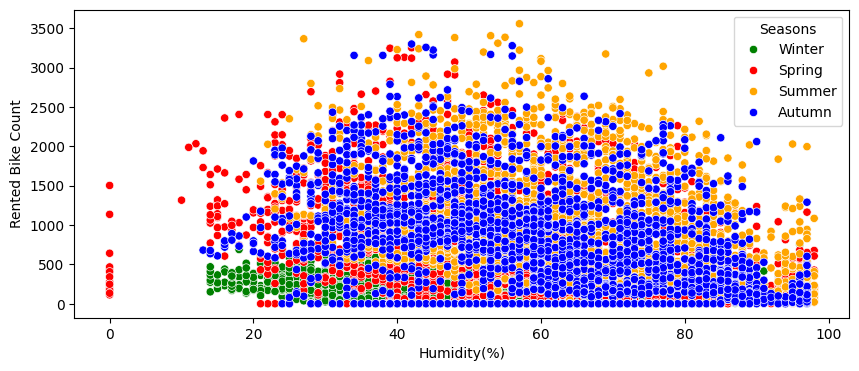

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Humidity(%)',y='Rented Bike Count',hue = 'Seasons',data=df,palette=['green','red','orange','blue'])

In [ ]:
df['Humidity(%)'].value_counts()

Humidity(%)
53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: count, Length: 90, dtype: int64

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Temperature, Rented Bike Count for diffrent Seasons**

<Axes: xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

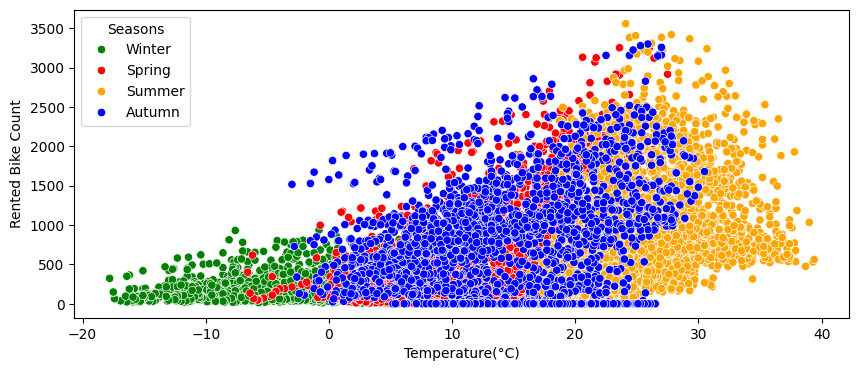

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Temperature(°C)',y='Rented Bike Count',hue = 'Seasons',data=df,palette=['green','red','orange','blue'])

#### **Hour, Rented Bike Count for diffrent Seasons**

In [ ]:
df['Hour'].value_counts()

Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64

In [ ]:
Hour_and_Rented_Bike_Count = df.groupby(['Hour'])['Rented Bike Count'].sum()
Hour_and_Rented_Bike_Count

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

<ipython-input-24-18aee3bbf72e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Hour_and_Rented_Bike_Count.index, y=Hour_and_Rented_Bike_Count.values,palette='tab10')


Text(0, 0.5, 'Total Rented Bike Count')

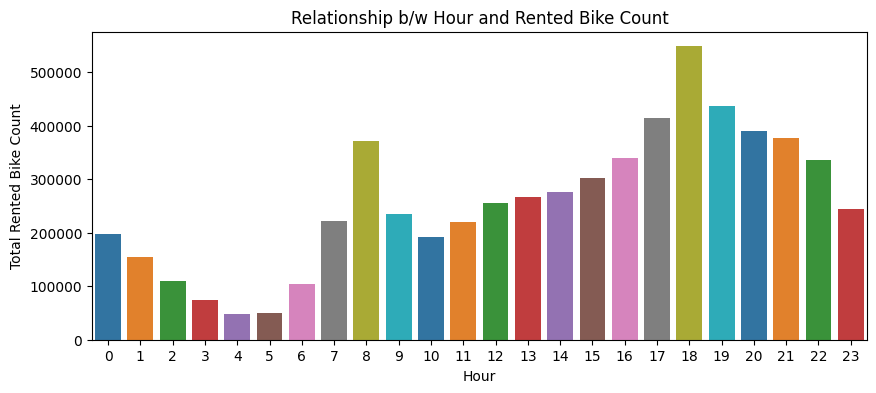

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=Hour_and_Rented_Bike_Count.index, y=Hour_and_Rented_Bike_Count.values,palette='tab10')
plt.title('Relationship b/w Hour and Rented Bike Count')
plt.xlabel('Hour')
plt.ylabel('Total Rented Bike Count')

#### **Wind speed**

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

<Axes: xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

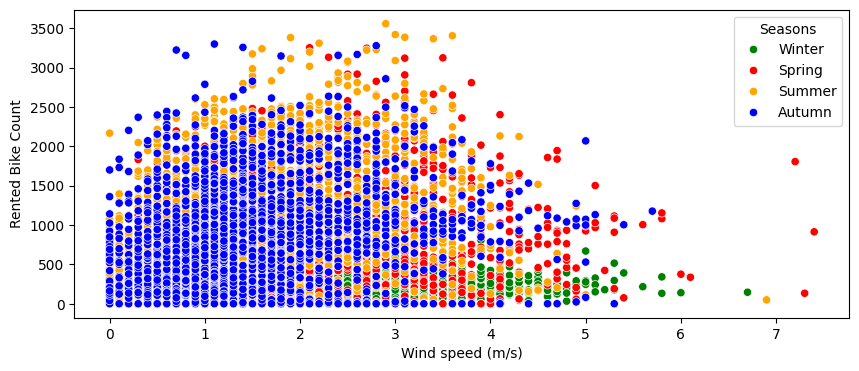

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Wind speed (m/s)',y='Rented Bike Count',hue = 'Seasons',data=df,palette=['green','red','orange','blue'])

#### **Visibility**

<Axes: xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

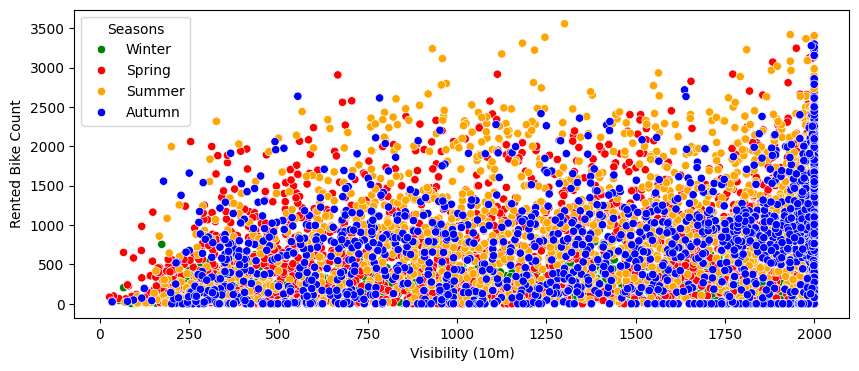

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Visibility (10m)',y='Rented Bike Count',hue = 'Seasons',data=df,palette=['green','red','orange','blue'])

#### **Rainfall**

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

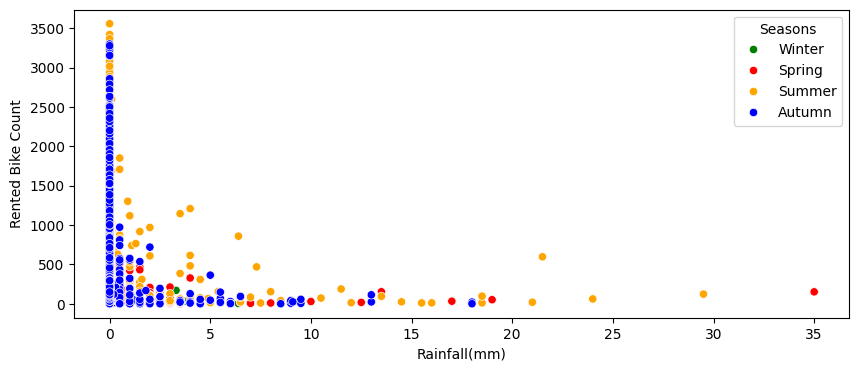

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Rainfall(mm)',y='Rented Bike Count',hue = 'Seasons',data=df,palette=['green','red','orange','blue'])

#### **Snowfall (cm)**

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

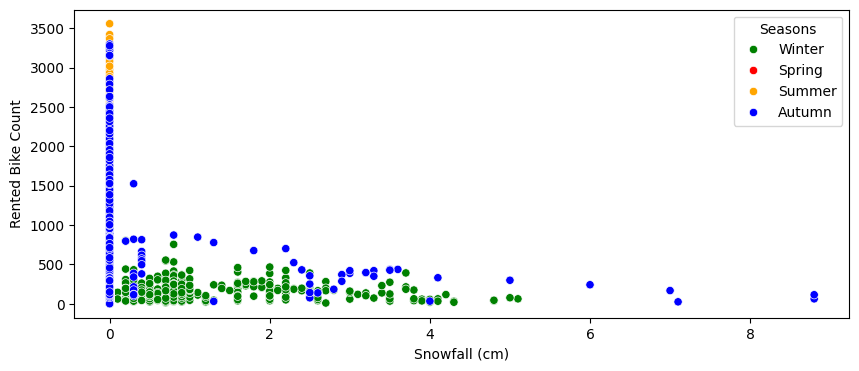

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Snowfall (cm)',y='Rented Bike Count',hue = 'Seasons',data=df,palette=['green','red','orange','blue'])

#### **Functioning Day**

In [ ]:
k = df.groupby('Functioning Day')['Rented Bike Count'].sum().sort_values(ascending=False)
k

Functioning Day
Yes    6172314
No           0
Name: Rented Bike Count, dtype: int64

<ipython-input-31-0bcefa9e2258>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=k.index,y=k.values,palette='tab10')


<Axes: xlabel='Functioning Day'>

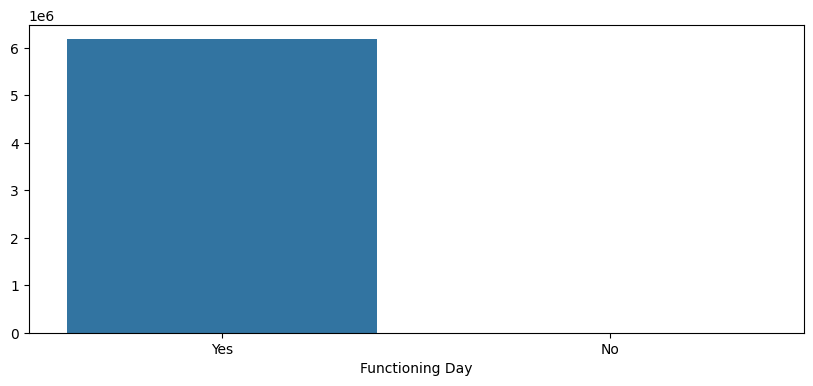

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=k.index,y=k.values,palette='tab10')

#### **Date Month**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df['Date'][0][3:5]

'12'

In [ ]:
df['temp_Month'] = df['Date'].apply(lambda x: x[3:5])
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day temp_Month  
0             Yes         12  
1             Yes         12  
2             Yes         12  
3             Yes         12  
4             Yes         12

In [ ]:
df['temp_Month'].value_counts()

temp_Month
12    744
01    744
03    744
05    744
07    744
08    744
10    744
04    720
06    720
09    720
11    720
02    672
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df['Date'][0]

'01/12/2017'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')

In [ ]:
df['month'] = df['Date'].dt.month

In [ ]:
k = df.groupby('month')['Rented Bike Count'].sum().sort_values(ascending=False)
k

month
6     896887
7     734460
5     707088
9     673612
8     651887
10    650675
4     524227
11    465715
3     380594
12    185330
2     151833
1     150006
Name: Rented Bike Count, dtype: int64

<ipython-input-41-0bcefa9e2258>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=k.index,y=k.values,palette='tab10')


<Axes: xlabel='month'>

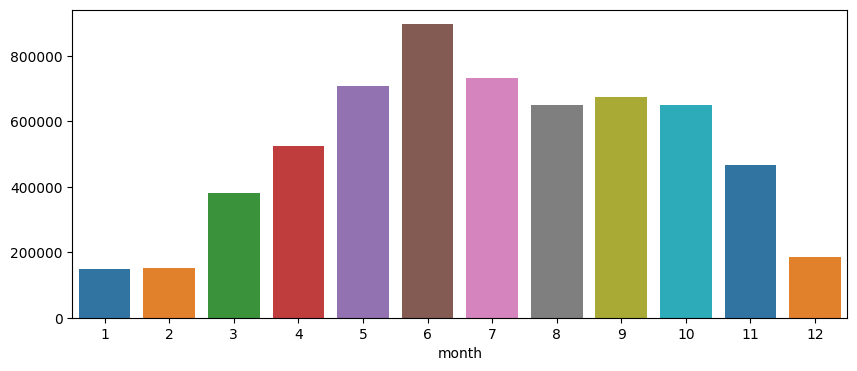

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=k.index,y=k.values,palette='tab10')

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day temp_Month  month  
0             Yes         12     12  
1             Yes         12     12  
2             Yes         12     12  
3             Yes         12     12  
4             Yes         12     12

#### **Solar Radiation (MJ/m2)**

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'temp_Month', 'month'],
      dtype='object')

<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

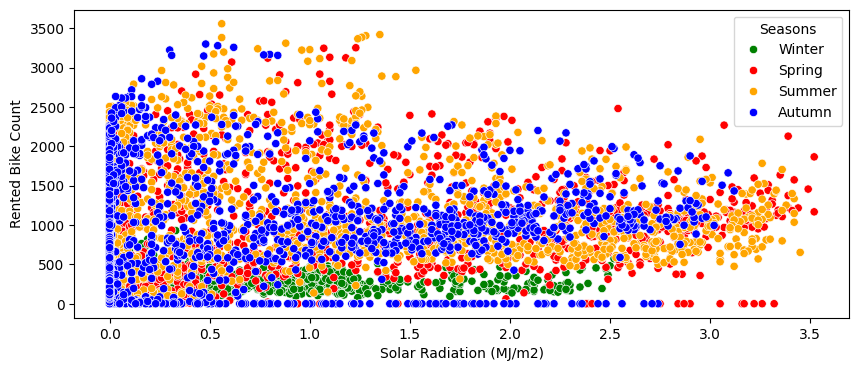

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Solar Radiation (MJ/m2)',y='Rented Bike Count',hue = 'Seasons',data=df,palette=['green','red','orange','blue'])

#### **Rented Bike Count**

<ipython-input-45-3b530191230f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rented Bike Count'],color='r')


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

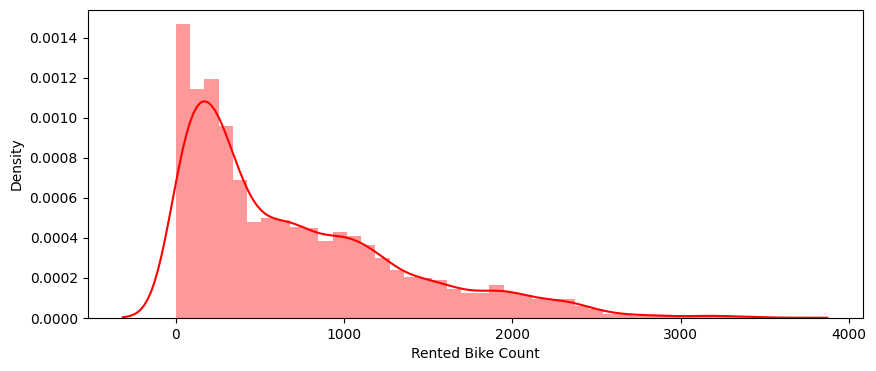

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df['Rented Bike Count'],color='r')

## EDA Conclusion

## **Feature Engineering**

In [ ]:
 df.describe().columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month'],
      dtype='object')

In [ ]:
num_features = df.describe().columns
num_features

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month'],
      dtype='object')

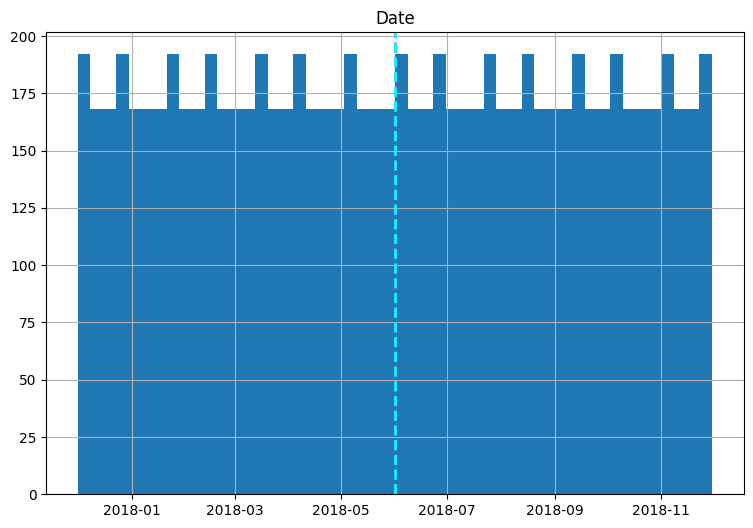

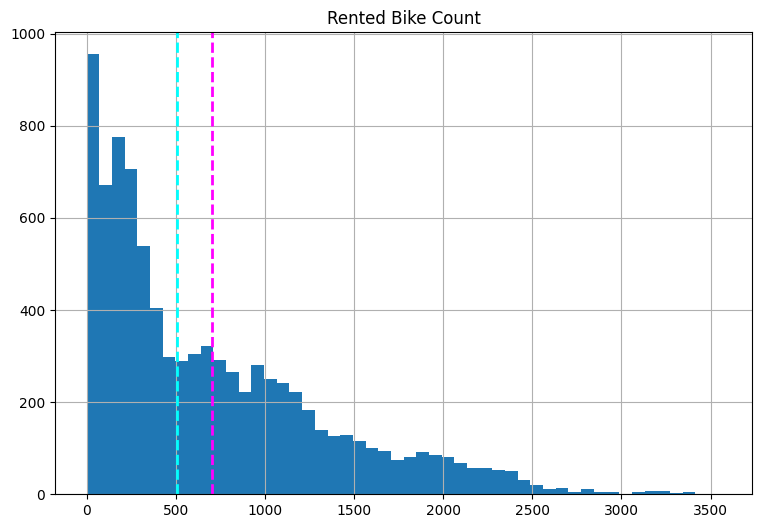

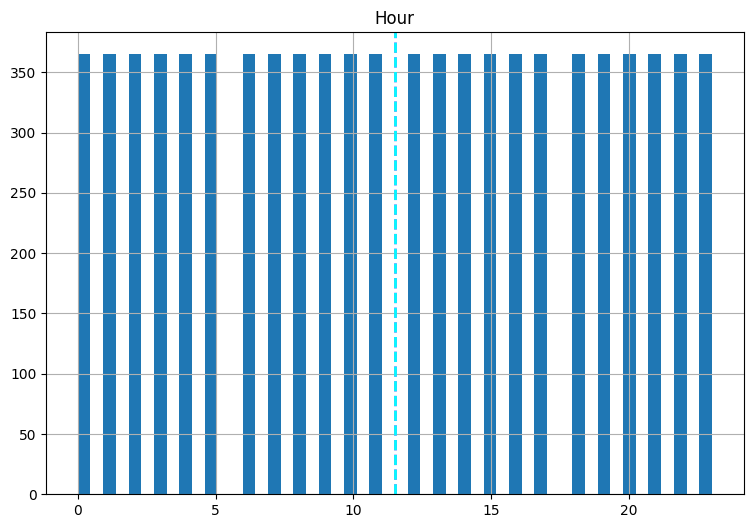

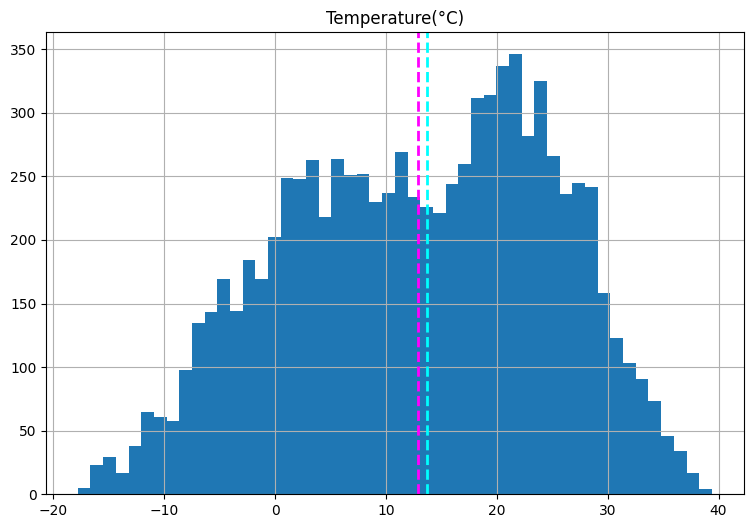

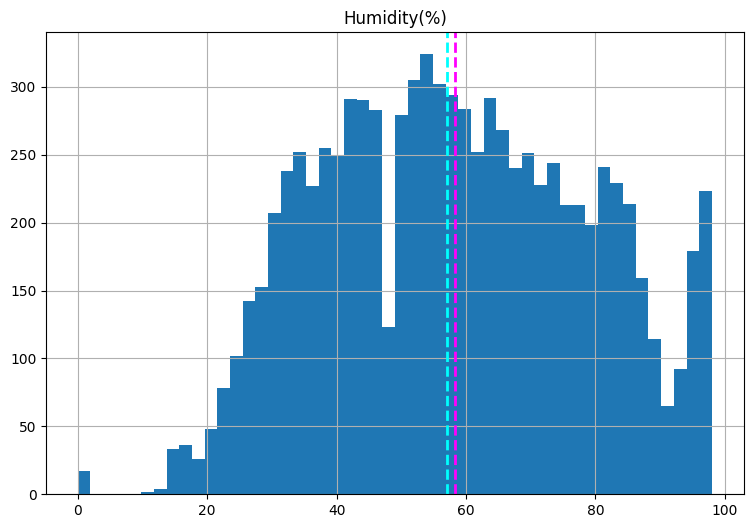

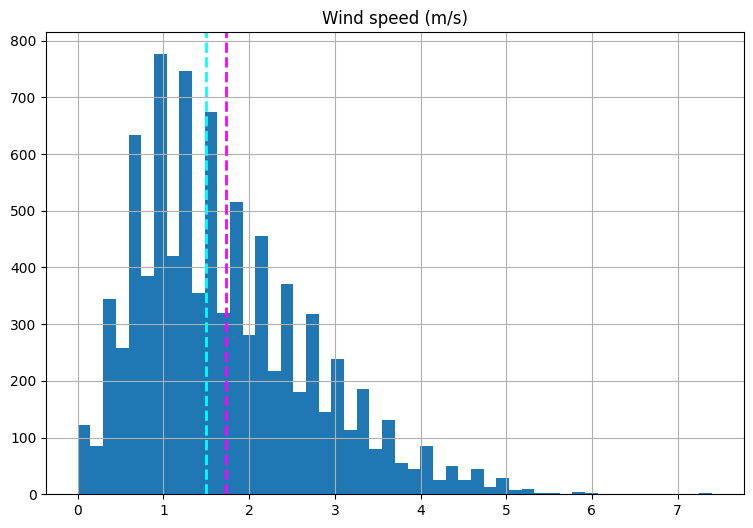

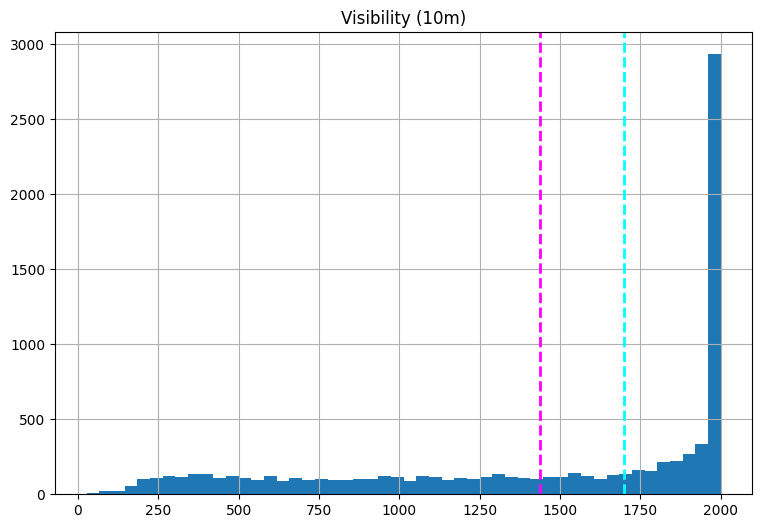

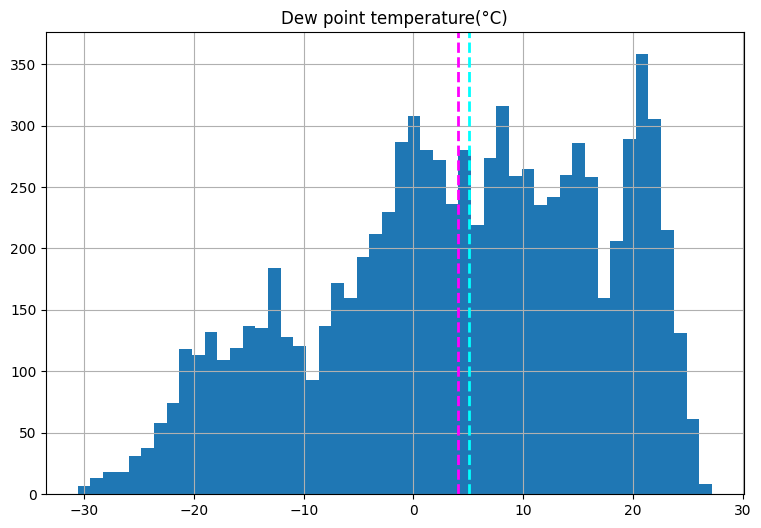

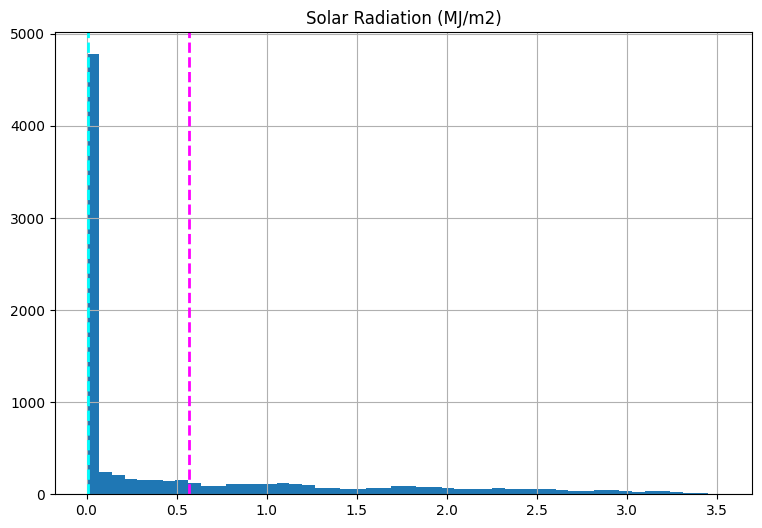

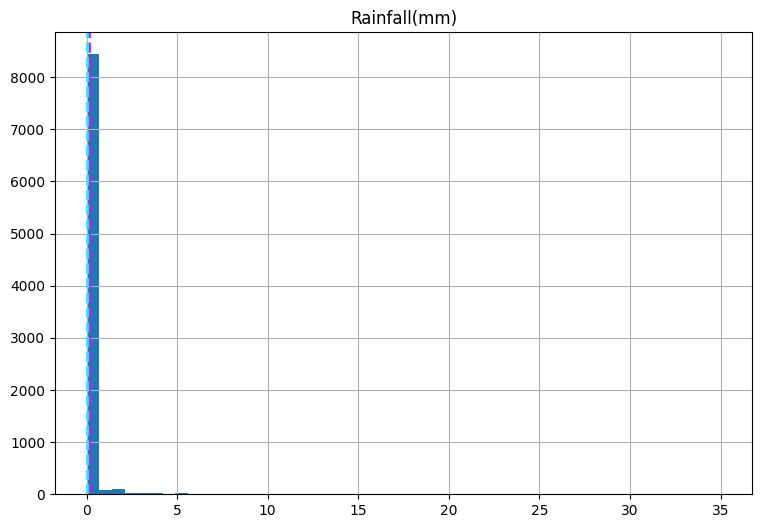

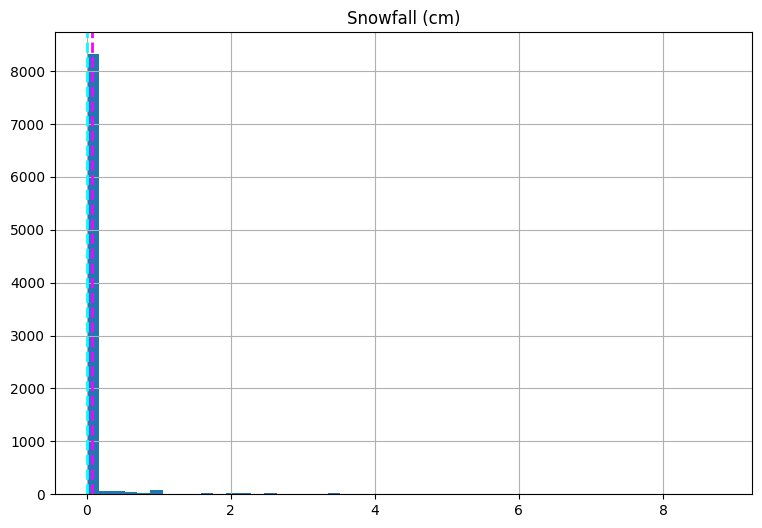

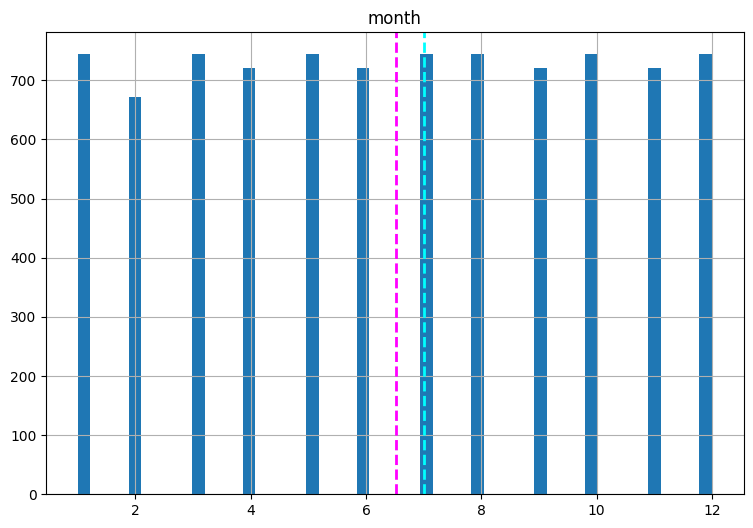

In [ ]:
#plot a bar plot for each numerical feature count

for col in num_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

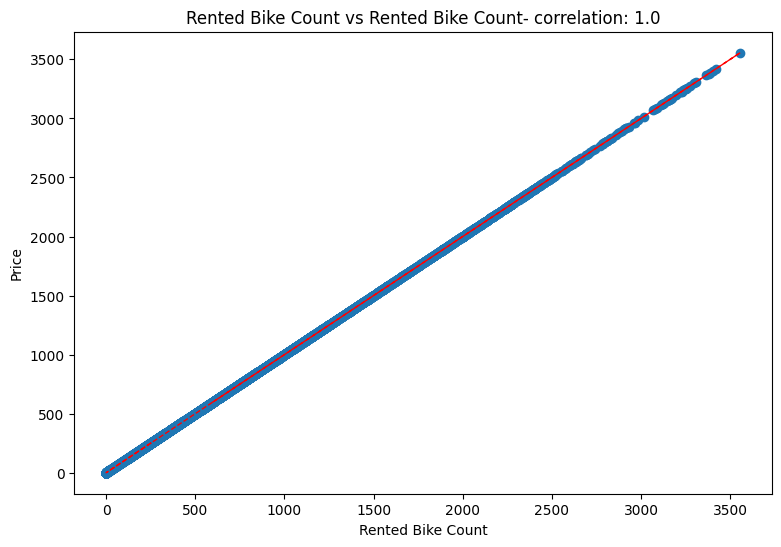

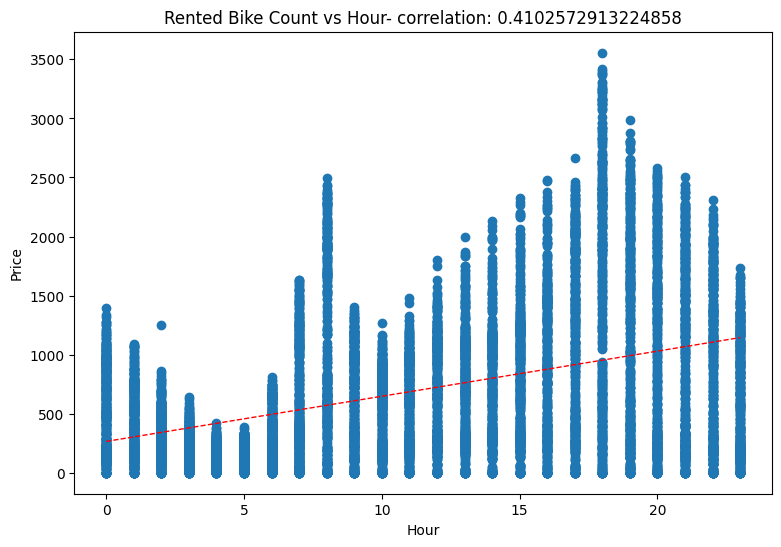

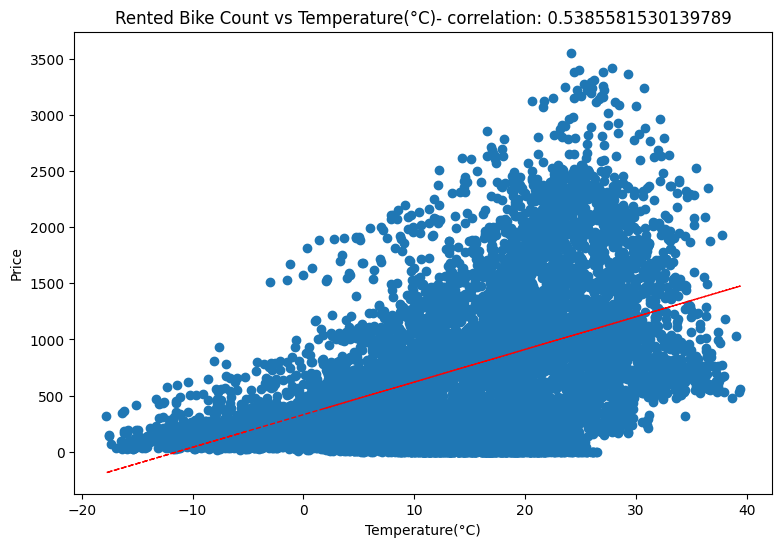

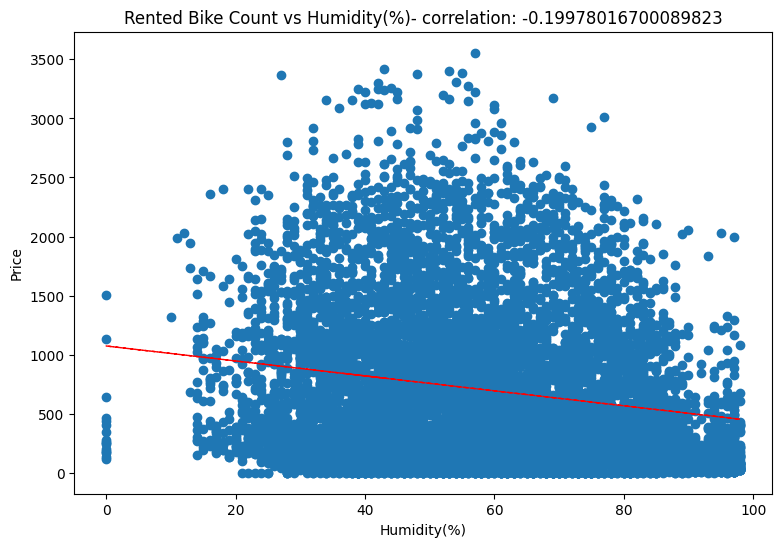

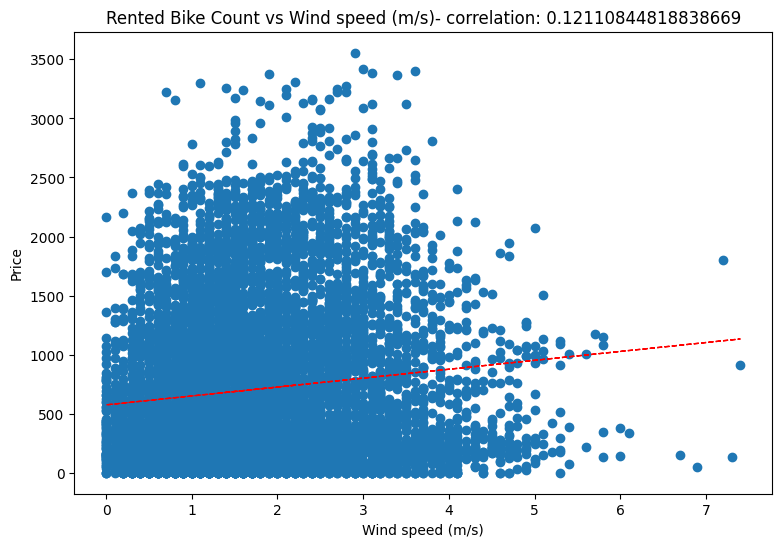

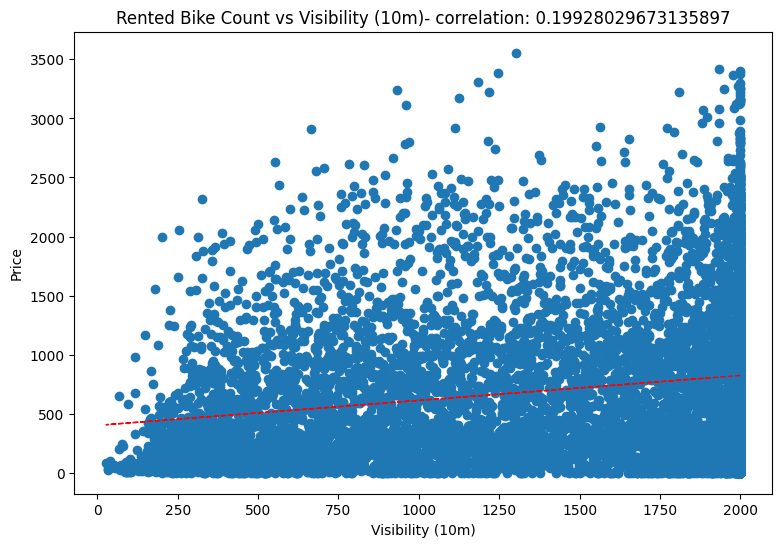

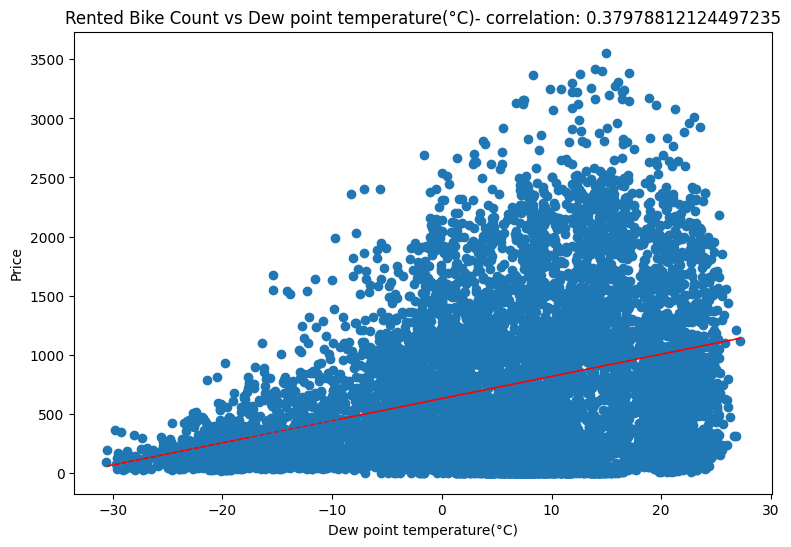

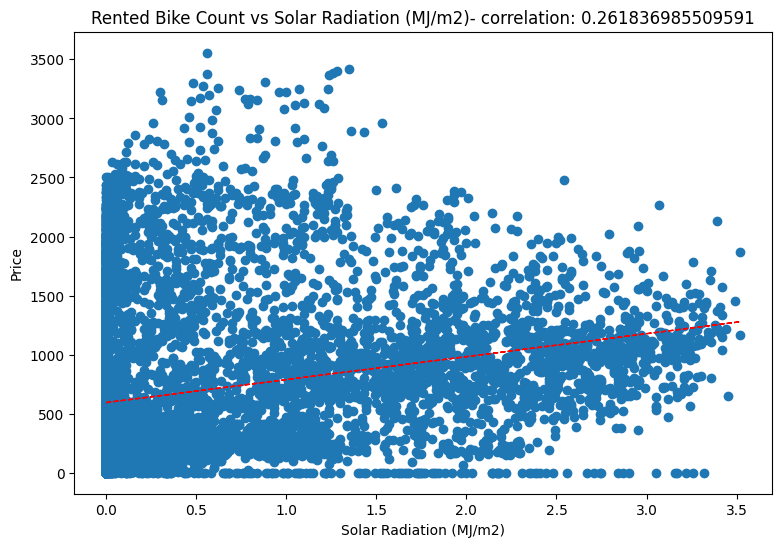

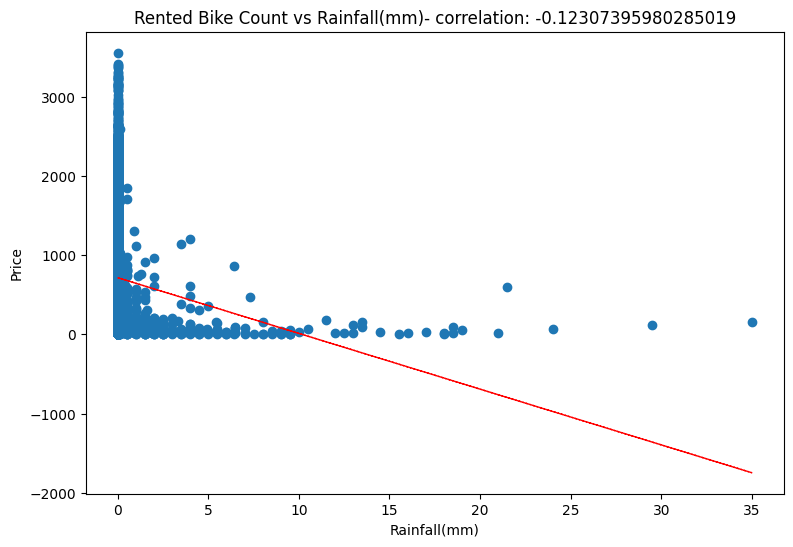

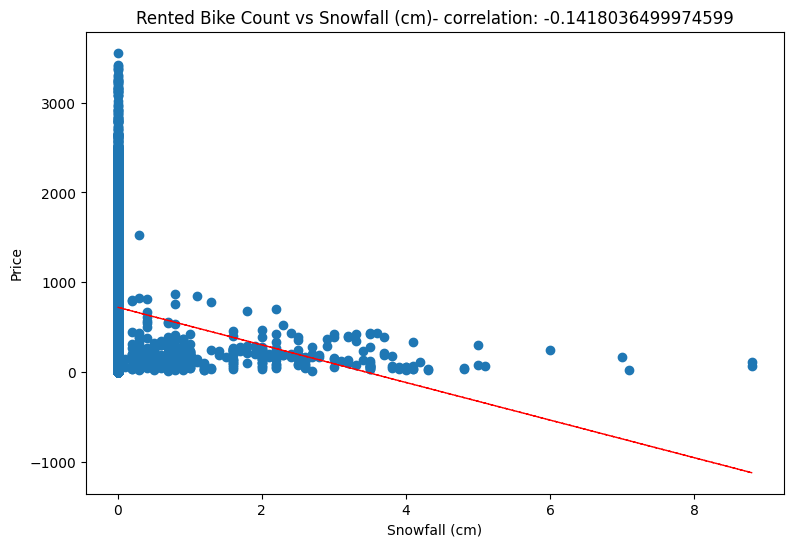

In [ ]:
# Correlation & scatter plot 'Rented Bike Count'
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature =(df[col])
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)
plt.show()

### **Pair plot implemented for dataset**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


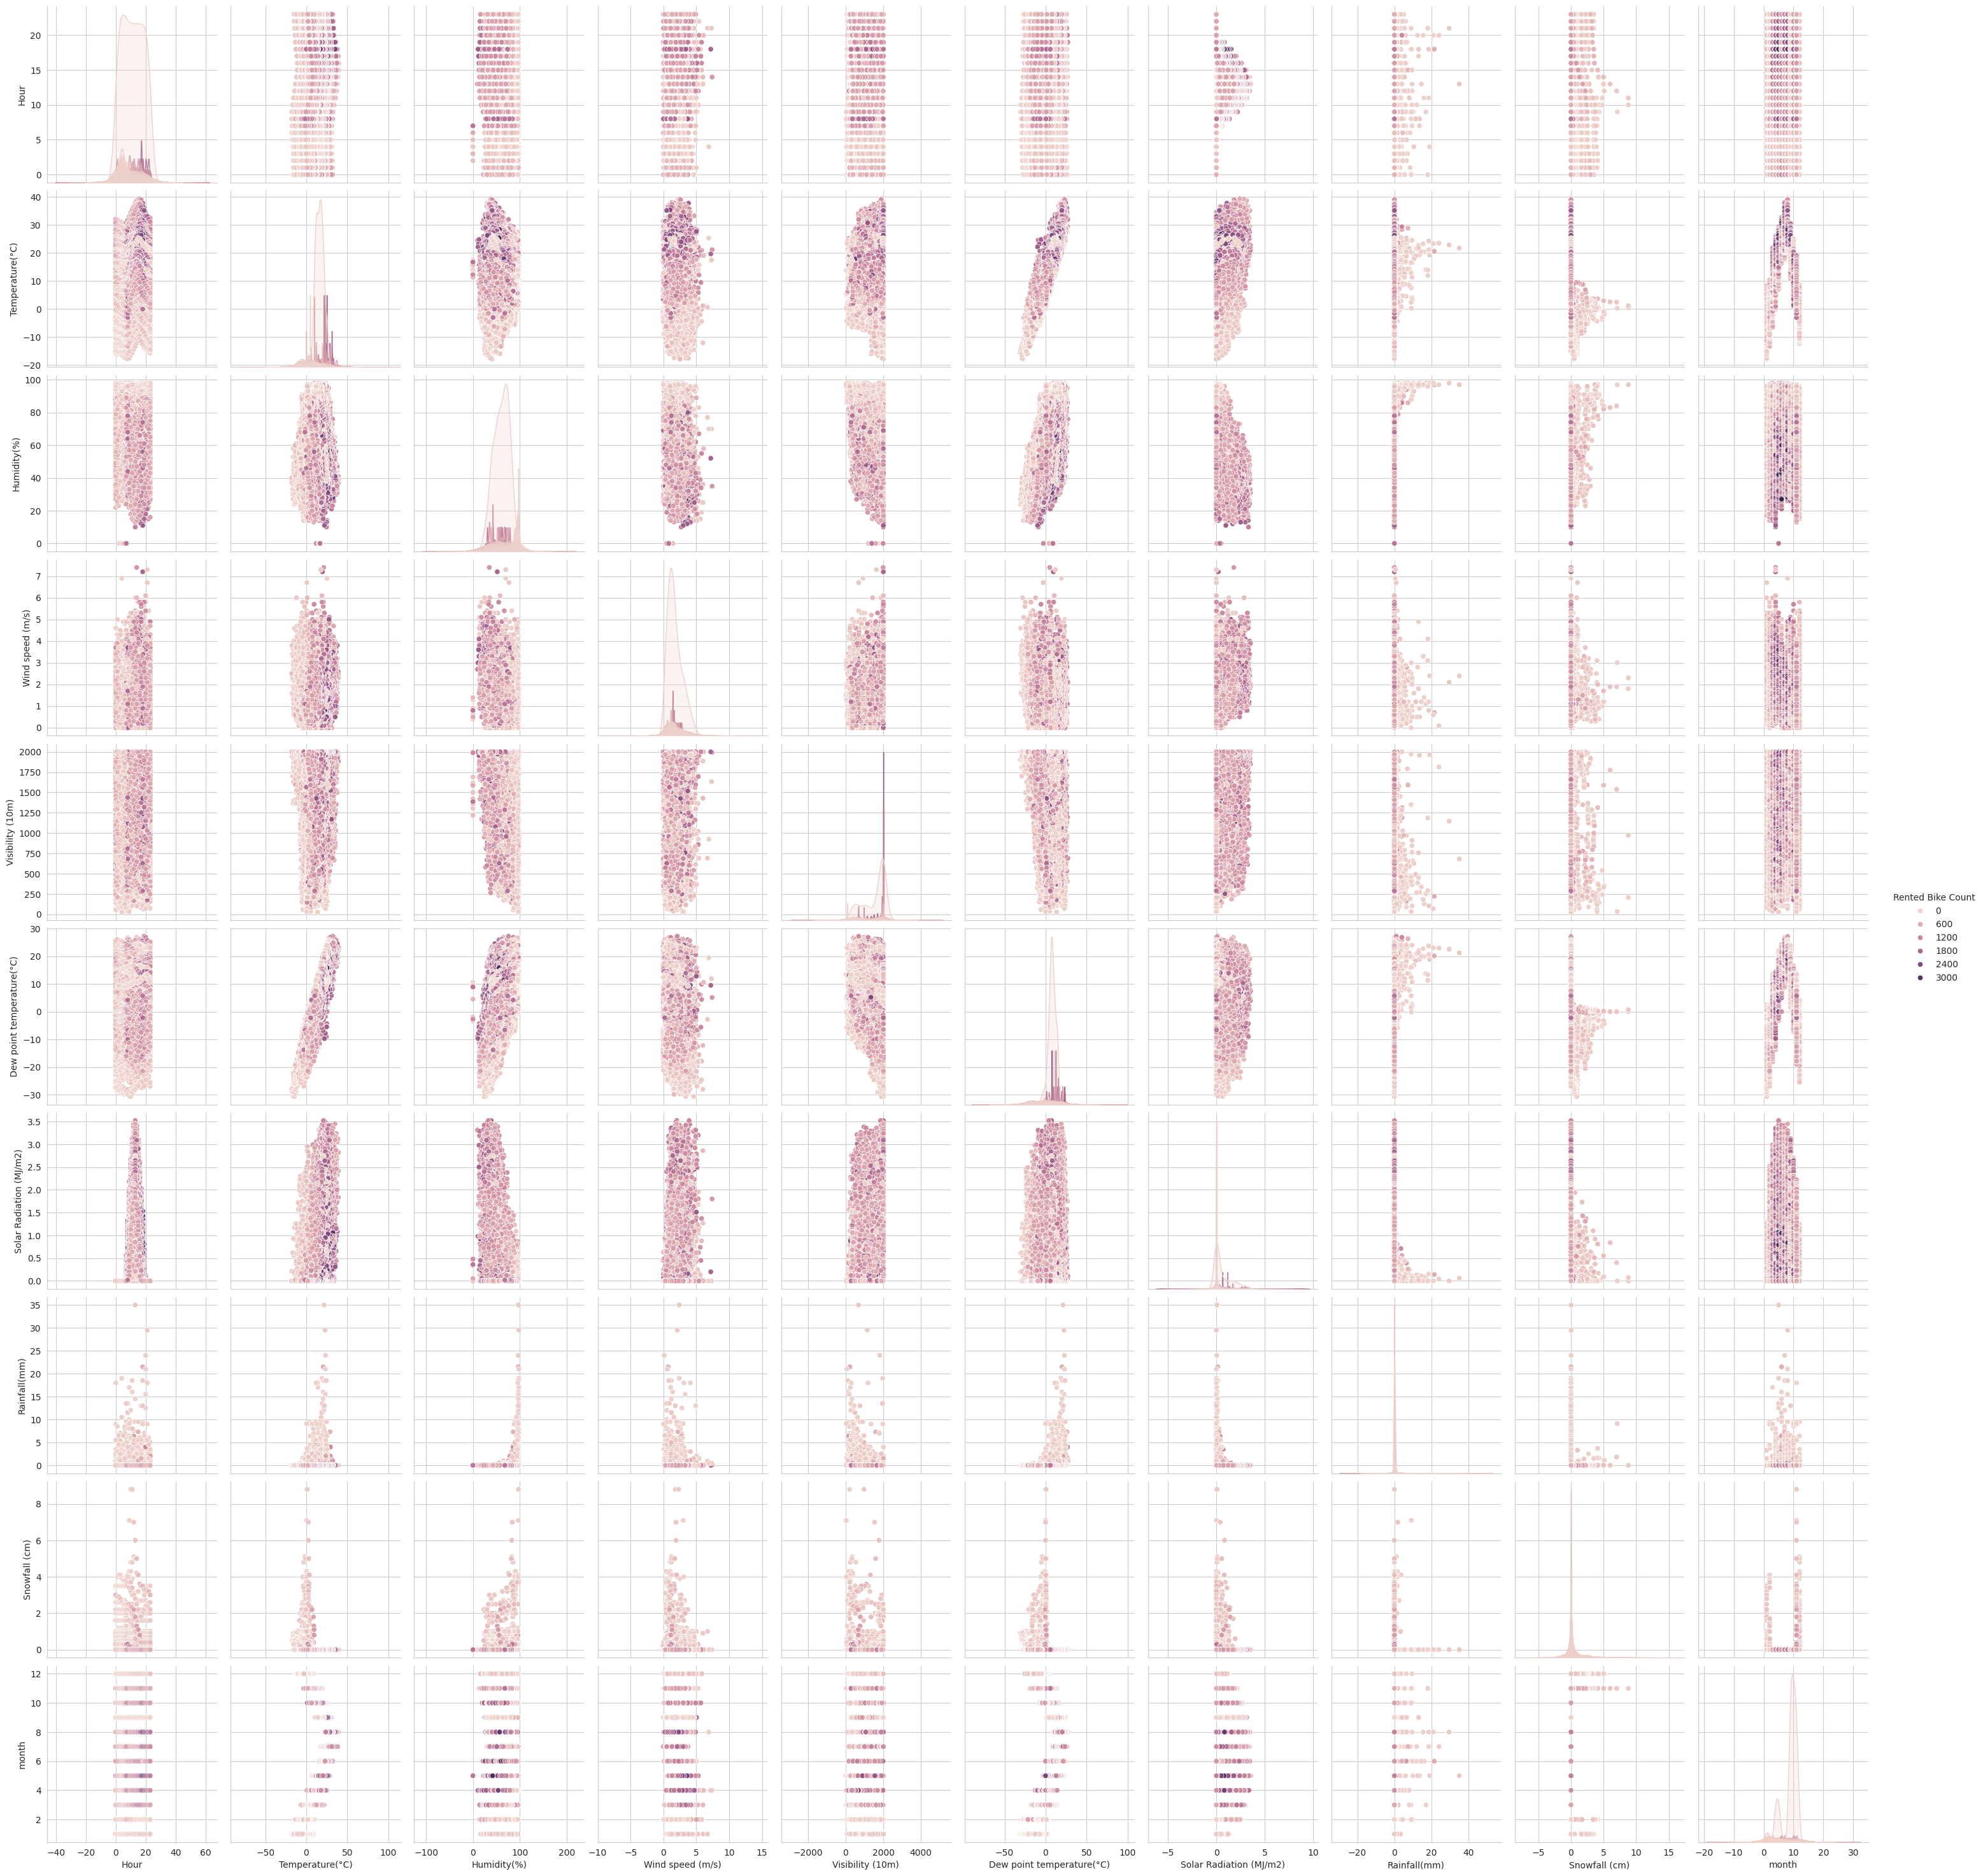

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Rented Bike Count", size=3);
plt.show()

### **Feature incoding And creation**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day_name()
df['year'] = df['Date'].map(lambda x: x.year).astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df.drop(columns = ['Date','temp_Month'],axis=1,inplace=True)

In [ ]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day     month  \
0           0.0            0.0  Winter  No Holiday             Yes  December   
1           0.0            0.0  Winter  No Holiday             Yes  December   
2           0.0            0.0  Winter  No Holiday             Yes  December   
3           0.0            0.0  Winter  No Holiday             Yes  December   
4           0.0            0.0  Winter  No Holiday             Yes  December   

      day  year  
0  Friday  2017  
1  Friday  2017  
2  Friday  2017  
3  Friday  2017  
4  Friday  2017

**Creating New feature Week day and weekend**

In [ ]:
df['week'] = df['day'].apply(lambda x:'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekday')
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day     month  \
0           0.0            0.0  Winter  No Holiday             Yes  December   
1           0.0            0.0  Winter  No Holiday             Yes  December   
2           0.0            0.0  Winter  No Holiday             Yes  December   
3           0.0            0.0  Winter  No Holiday             Yes  December   
4           0.0            0.0  Winter  No Holiday             Yes  December   

      day  year     week  
0  Friday  2017  Weekday  
1  Friday  2017  Weekday  
2  Friday  2017  Weekday  
3  Friday  2017  Weekday  
4  Friday  2017  Weekday

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

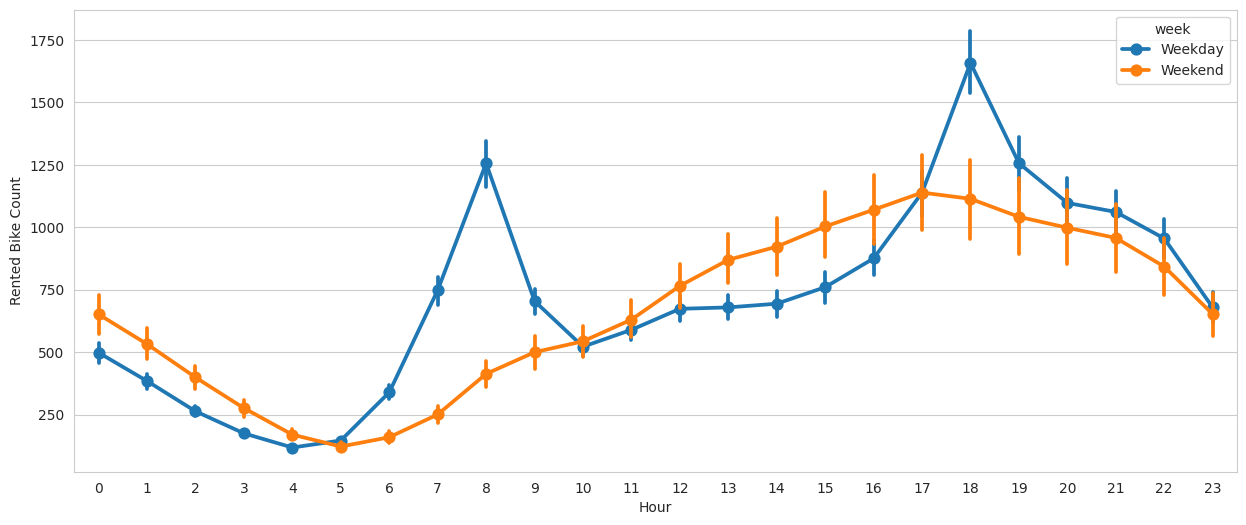

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df['week'])

In [ ]:
df.drop(columns = ['day'],axis=1,inplace=True)

**Lets do some feature engineering on Hour column**

In [ ]:
# defining a function for distribute hour column
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'

In [ ]:
df['Hour'] = df['Hour'].apply(hour)

In [ ]:
df.head(1)

Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254  Night             -5.2           37               2.2   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day     month  \
0           0.0            0.0  Winter  No Holiday             Yes  December   

   year     week  
0  2017  Weekday

### **Features Selections**

#### **Correlation**

In [ ]:
int_columns_df = df.select_dtypes(include=['int', 'float'])

In [ ]:
int_columns_df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

<Axes: >

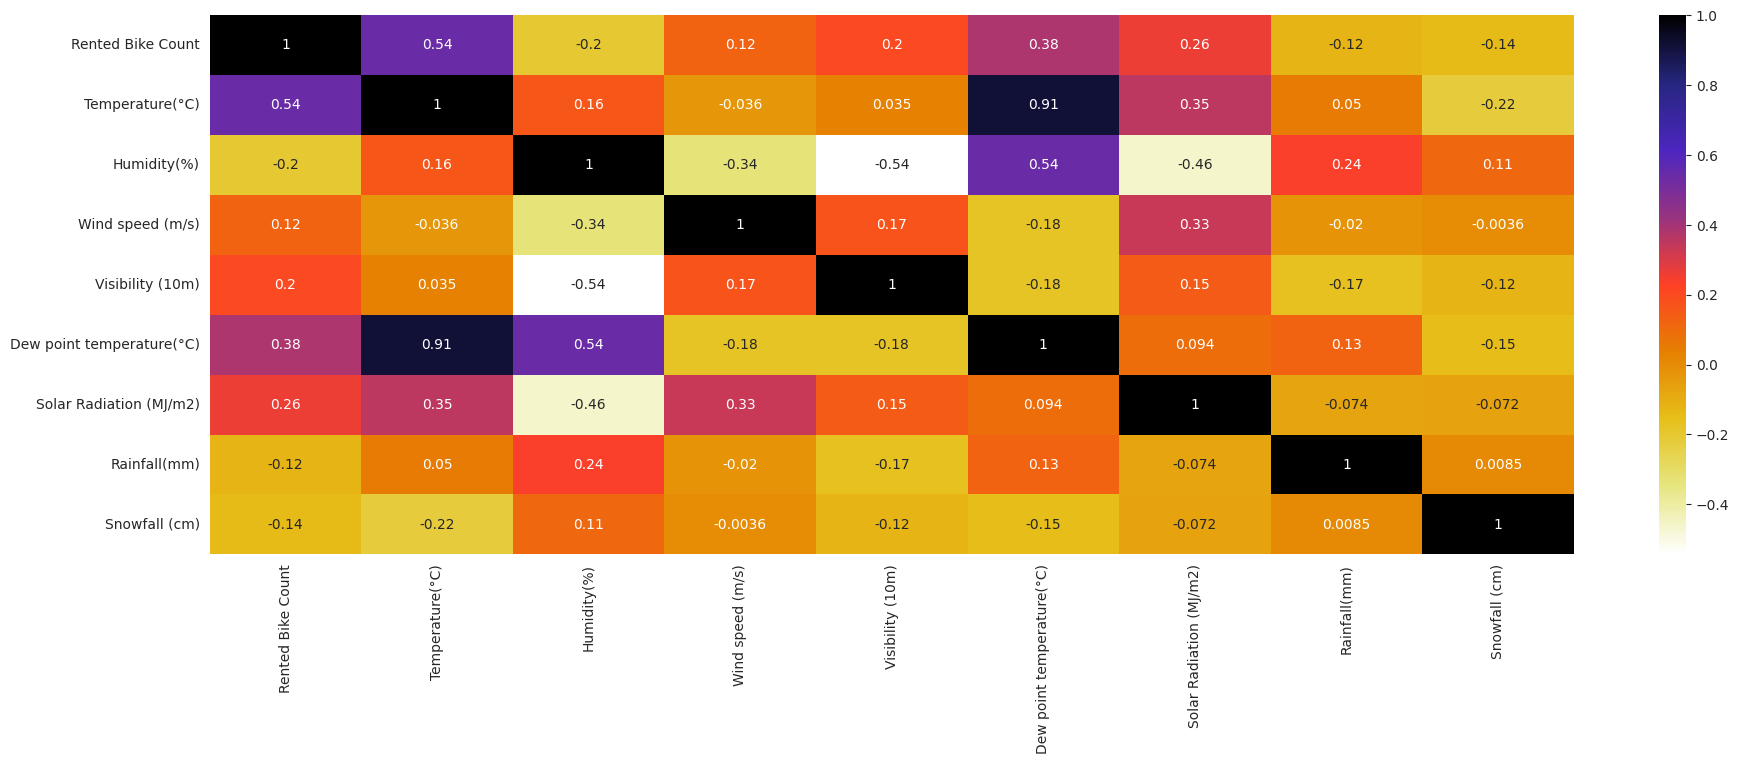

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(int_columns_df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

#### **Checking for Variacian Inflation(VIF)**

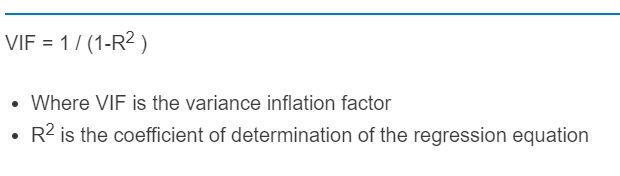

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function for checking Checking for variacian inflation
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in int_columns_df.columns if i not in ['Rented Bike Count']]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

In [ ]:
calc_vif(df[[i for i in int_columns_df.columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

## **Data Pre-processing**

### **Feature Scaling**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec

In [ ]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   Rented Bike Count          8760 non-null   int64              
 1   Temperature(°C)            8760 non-null   float64            
 2   Humidity(%)                8760 non-null   int64              
 3   Wind speed (m/s)           8760 non-null   float64            
 4   Visibility (10m)           8760 non-null   int64              
 5   Dew point temperature(°C)  8760 non-null   float64            
 6   Solar Radiation (MJ/m2)    8760 non-null   float64            
 7   Rainfall(mm)               8760 non-null   float64            
 8   Snowfall (cm)              8760 non-null   float64            
 9   Hour_Morning               1 non-null      Sparse[bool, False]
 10  Hour_Night                 1 non-null      Sparse[bool, False]
 11  Hour

<ipython-input-67-dbdce3ffa7b2>:2: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  new_df.info()


In [ ]:
'gender'
male
female
male

NameError: name 'male' is not defined

In [ ]:
gender_male       gender_female
  1                 0
  0                 1
  1                 0

In [ ]:
gender_female
0
1
0

In [ ]:
X = new_df.drop(columns=['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(new_df['Rented Bike Count'])

**transforming X_train and X_test with yeo-johnson transformation**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
1000
10

In [ ]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler,StandardScaler

In [ ]:
scal = PowerTransformer()
x_train = scal.fit_transform(x_train)
x_test = scal.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1074: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1074: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


## **Model Implementation**

### **Import Dependancy**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**Create a function for scores**

In [ ]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    # try:

    #   # ploting the graph of feature importance

    #   best = model.best_estimator_
    #   features = X_train.columns
    #   importances = best.feature_importances_
    #   indices = np.argsort(importances)
    #   plt.figure(figsize=(10,15))
    #   plt.title('Feature Importance')
    #   plt.barh(range(len(indices)), importances[indices], color='red', align='center')
    #   plt.yticks(range(len(indices)), [features[i] for i in indices])
    #   plt.xlabel('Relative Importance')
    #   plt.show()

    # except:
    #   pass

  # Here we appending the parameters for all models
  # mean_absolut_error.append(MAE)
  # mean_sq_error.append(MSE)
  # root_mean_sq_error.append(RMSE)
  # training_score.append(training)
  # r2_list.append(r2)
  # adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 0.7528304949500195
MAE : 4.8409982845180926
MSE : 38.178135932603446
RMSE : 6.178845841466143
R2 : 0.747741915753567
Adjusted R2 :  0.7444734167443582 

********************************************************************************
coefficient 
 [ 5.95508209 -1.62770952  0.2515433   0.5636376   0.72879401 -3.06033017
  0.07512372 -1.90288105 -5.19005315 -3.693359   -0.10264436 -0.29086177
 -0.99552432  0.67296183  5.36751057 -1.12073129 -0.06739495 -0.86094349
 -0.64704363 -0.42827696  1.11789926 -0.52207466  0.54913309  0.70144529
  1.10463537  0.32806082  0.06739495 -0.62810677]


Intercept  =  23.442819487037085


******************** ploting the graph of Actual and predicted only with 80 observation ********************


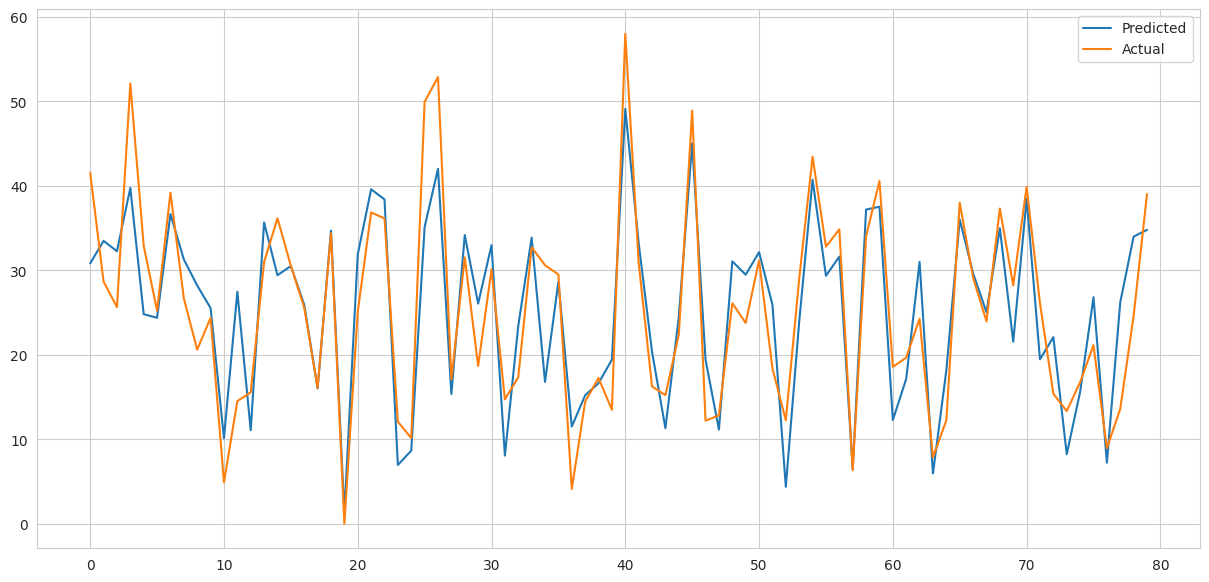

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [ ]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+04, tolerance: 8.230e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.605e+04, tolerance: 8.183e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.334e+04, tolerance: 8.195e

Training score  = 0.7528304949261196
The best parameters found out to be :{'alpha': 1e-05} 
where model best score is:  0.750435588930922 

MAE : 4.840996281654296
MSE : 38.178118532942186
RMSE : 6.178844433463444
R2 : 0.7477420307200291
Adjusted R2 :  0.7444735332004366 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


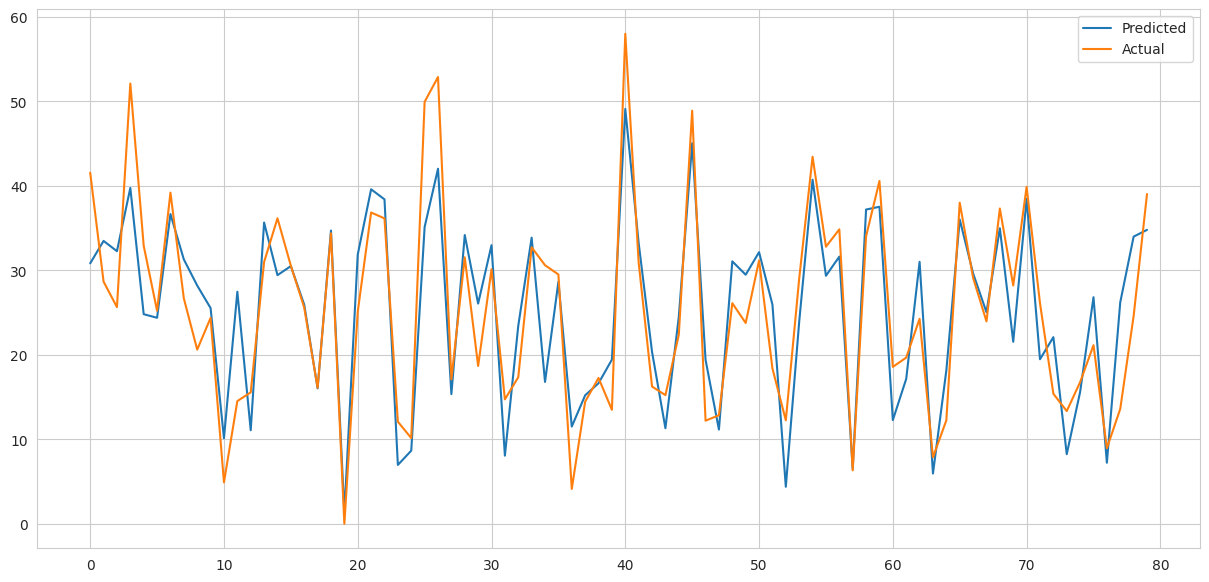

In [ ]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

Training score  = 0.7528302715828596
The best parameters found out to be :{'alpha': 1.9} 
where model best score is:  0.750436106431931 

MAE : 4.840845216016073
MSE : 38.17595421957842
RMSE : 6.178669291973671
R2 : 0.7477563311967159
Adjusted R2 :  0.7444880189678904 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


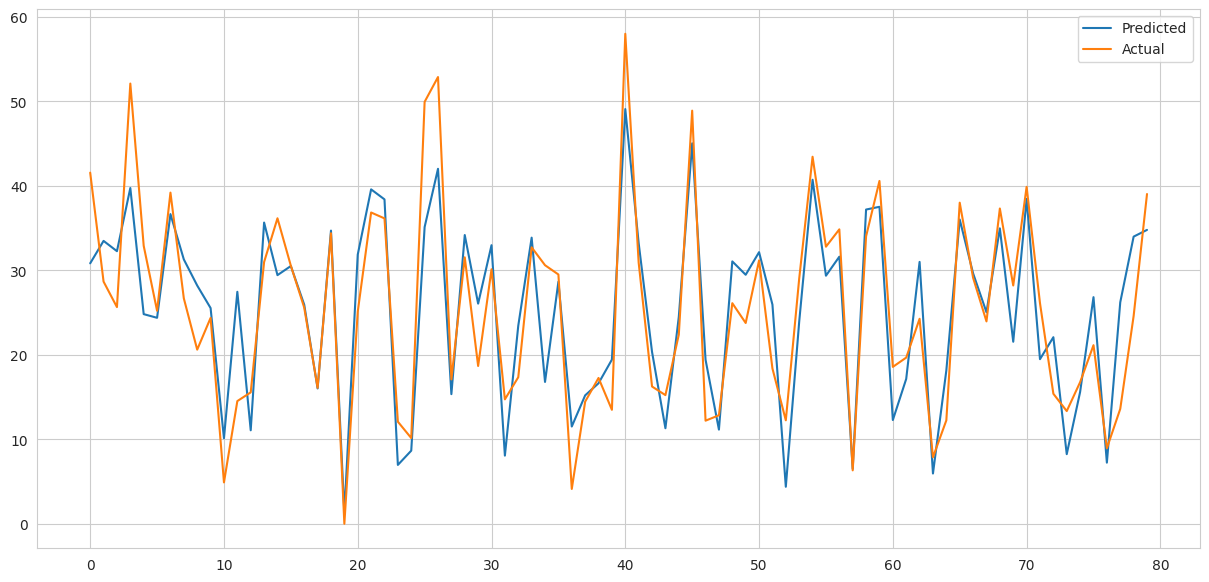

In [ ]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

### **Polynomial**

In [ ]:
poly = PolynomialFeatures(degree = 2)
poly_X_train = poly.fit_transform(x_train)
poly_X_test = poly.transform(x_test)

#### **LinearRegression**

Training score  = 0.863959731549411
MAE : 3.528692122812998
MSE : 23.096340914731336
RMSE : 4.805865261816163
R2 : 0.8473933163594525
Adjusted R2 :  0.8095461627769905 

********************************************************************************
coefficient 
 [ 1.39082411e+08  4.47153918e+00 -2.07885247e+00  2.08677946e-01
  2.42503763e-01  1.33212689e+00 -2.07344553e+00  1.43512504e+11
 -1.42468940e+11  2.22662129e+11 -3.80070952e+11  2.75541730e+11
 -2.00600098e+11  6.70105026e+10 -1.76531130e+11  2.35381047e+11
 -1.47616329e+11  1.01741490e+11 -3.21620706e+10  2.63712746e+11
  1.48710027e+11  4.37087258e+10 -1.89403338e+11  1.82251284e+11
 -1.53525783e+11 -7.01629270e+10 -1.38112985e+11  2.53564312e+11
 -1.11479765e+11 -2.39765130e+00 -1.10122296e+00 -5.07683558e-01
 -7.70289812e-01 -3.77395630e-01  1.13304138e-01 -6.85428619e-01
 -2.62862635e+00 -1.27386475e+00 -7.72819519e-01  1.95267726e+10
  3.96760477e+10 -7.72418582e+09 -1.60397339e+00  1.52147293e+00
 -1.29825337e+10  4.

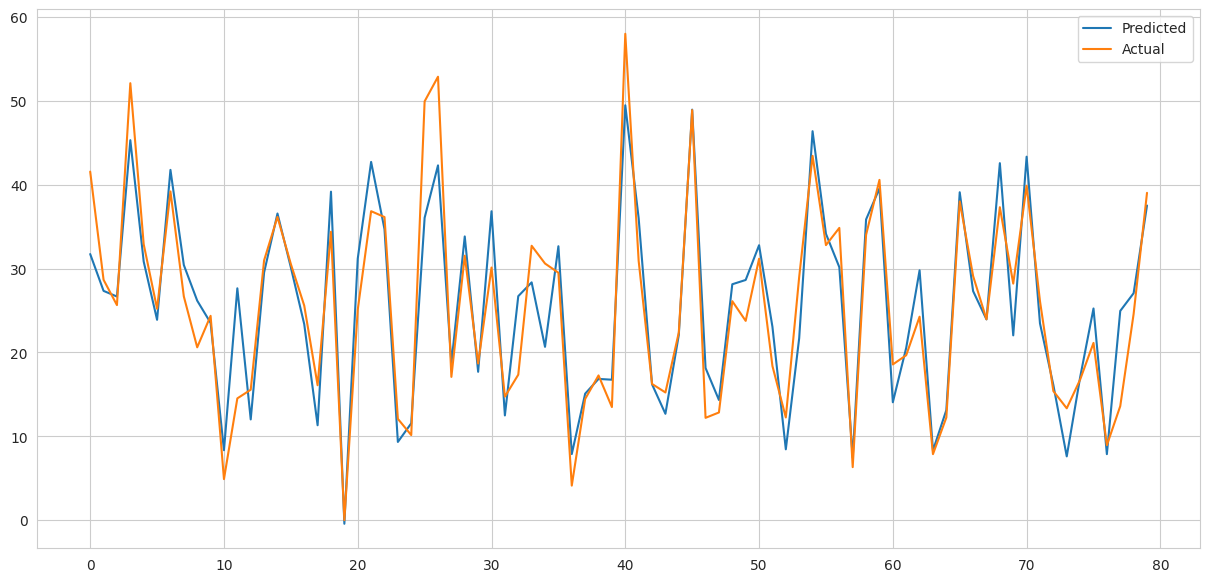

In [ ]:
score_metrix(LinearRegression(),poly_X_train,poly_X_test,y_train,y_test)

### **XGBoost Regression**

Training score  = 0.9999999864443684
The best parameters found out to be :{'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 150} 
where model best score is:  0.8495059574107282 

MAE : 3.198727606789294
MSE : 20.955024603741773
RMSE : 4.5776658466670295
R2 : 0.8615418423987915
Adjusted R2 :  0.8597478449842455 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


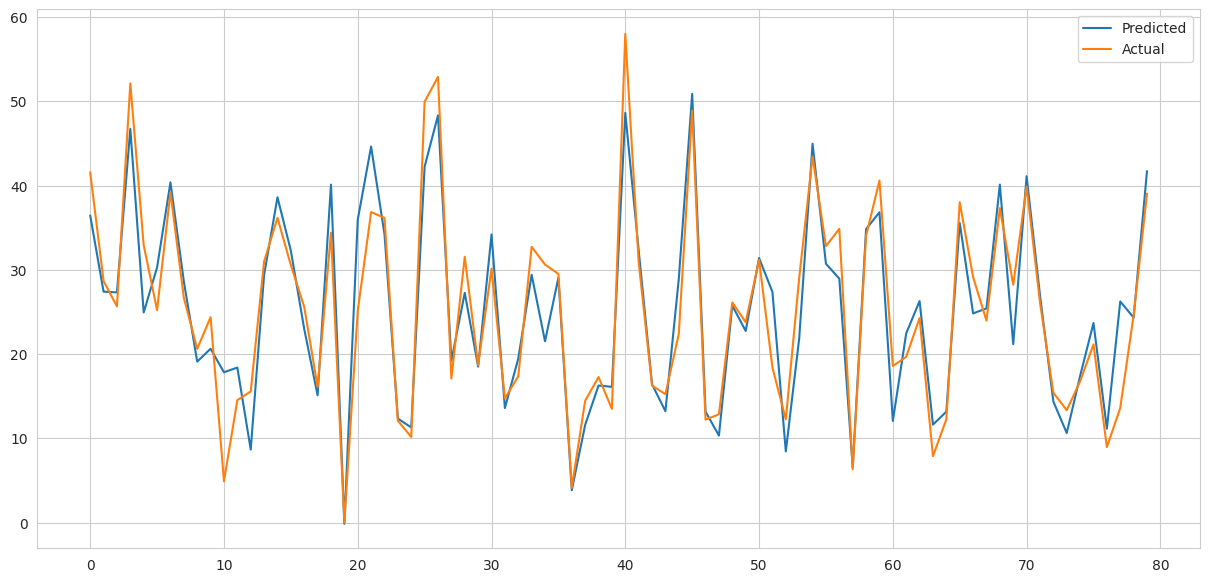

In [ ]:
params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}
xgb_grid_search= GridSearchCV(XGBRegressor(),param_grid=params,)
score_metrix(xgb_grid_search,x_train,x_test,y_train,y_test)

### **KNN Regressor**

Training score  = 0.8964090170017492
MAE : 3.6051653098283625
MSE : 25.928411576875384
RMSE : 5.091994852400715
R2 : 0.8286807023925434
Adjusted R2 :  0.8264609243578331 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


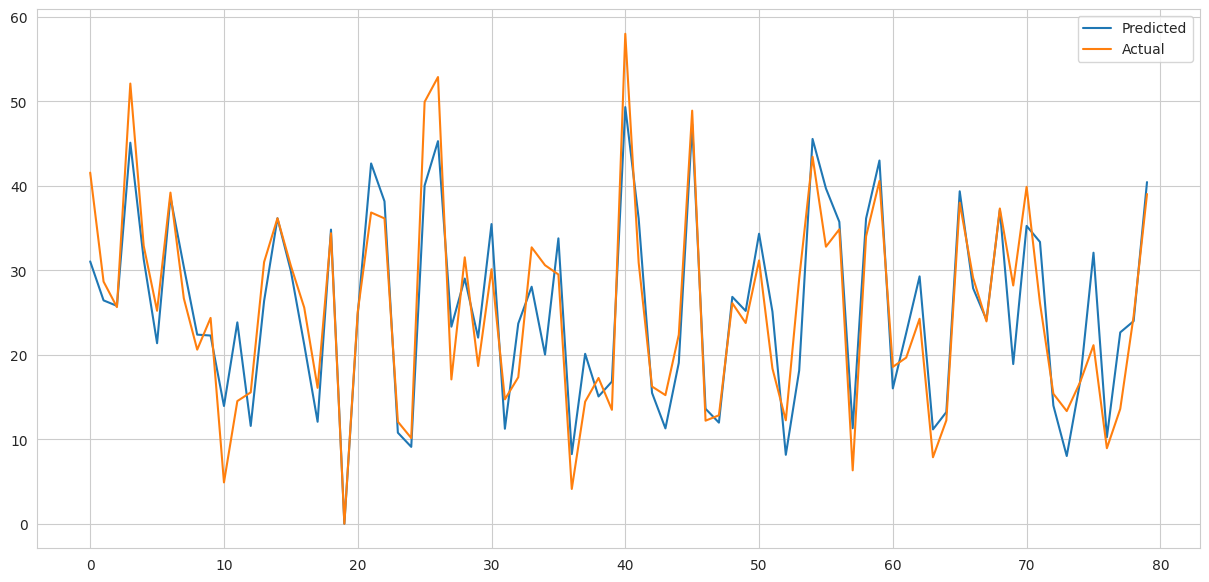

In [ ]:
# Using KNN Regression
knn = KNeighborsRegressor()

# Fitting Knn regressor
score_metrix(knn,x_train,x_test,y_train,y_test)

### **Using Random Forest Regressor**

In [ ]:
# # parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [ ]:
# Using Grid SearchCV
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Training score  = 0.9564251940646528
The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8761952221981634 

MAE : 2.9899074488527155
MSE : 17.68757688828597
RMSE : 4.205660101373621
R2 : 0.8831311652125431
Adjusted R2 :  0.8816168998844317 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


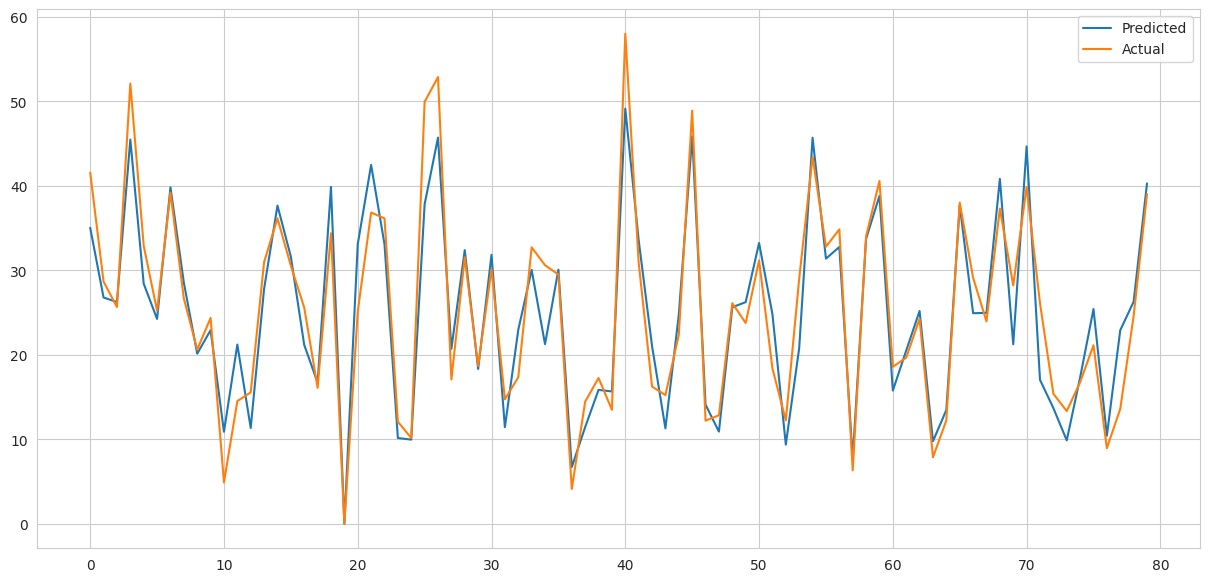

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Ranom_forest_Grid_search,x_train,x_test,y_train,y_test)